In [1]:
# librerías:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mp
import mlflow
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
datos = pd.read_excel(r'/home/ubuntu/prec/data/data.xlsx', sheet_name='Datos')
#datos = pd.read_excel(r'C:/Users/rlope/Downloads/data.xlsx', sheet_name='Datos')
datos.head(5)
datos_2 = datos

# Descripción de los datos

In [3]:
datos.shape

(1637, 11)

In [4]:
datos.head(5)

,Entidad,Fecha,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_ope/Activos,ROA,ROE,Calidad,Utilidad/Ingresos
0,BANCAMÍA S. A.,2018-01-01,17.59,334.0,225.122316,82.101505,13.439939,1.649447,6.832722,5.288146,5.398005
1,BANCAMÍA S. A.,2018-02-01,17.52,290.4,212.079849,81.778429,13.299214,1.699940,7.028450,5.395301,5.543541
2,BANCAMÍA S. A.,2018-03-01,17.55,291.2,205.329984,81.630571,12.960920,1.836486,7.571401,5.567269,5.961291
3,BANCAMÍA S. A.,2018-04-01,17.48,335.3,198.756601,83.327073,13.322951,1.938096,7.962732,5.479457,6.244561
4,BANCAMÍA S. A.,2018-05-01,15.57,346.8,196.161567,82.957054,13.263120,2.004092,8.310213,5.415416,6.451046


In [5]:
AtributosNumericos = datos.columns
AtributosNumericos = AtributosNumericos[2:]
print(AtributosNumericos)

Index(['Solvencia', 'IRL', 'Cartera/Depósitos', 'Cartera/Activos',
       'Gast_ope/Activos', 'ROA', 'ROE', 'Calidad', 'Utilidad/Ingresos'],
      dtype='object')


In [6]:
Estadisticas = pd.DataFrame(datos)
print(Estadisticas.describe())

                               Fecha    Solvencia          IRL  \
count                           1637  1637.000000  1637.000000   
mean   2020-09-21 18:05:29.871716608    16.517122   257.727123   
min              2018-01-01 00:00:00     0.000000    99.500000   
25%              2019-05-01 00:00:00    13.120000   161.000000   
50%              2020-10-01 00:00:00    15.360000   216.000000   
75%              2022-02-01 00:00:00    19.010000   310.600000   
max              2023-06-01 00:00:00    35.490000  1154.900000   
std                              NaN     4.886337   139.538432   

       Cartera/Depósitos  Cartera/Activos  Gast_ope/Activos          ROA  \
count        1637.000000      1637.000000       1637.000000  1637.000000   
mean          115.533089        72.342777          4.329825     1.072306   
min            26.458246        18.450307          0.839461    -8.492747   
25%            97.650273        69.327206          2.292735     0.525185   
50%           110.386953 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


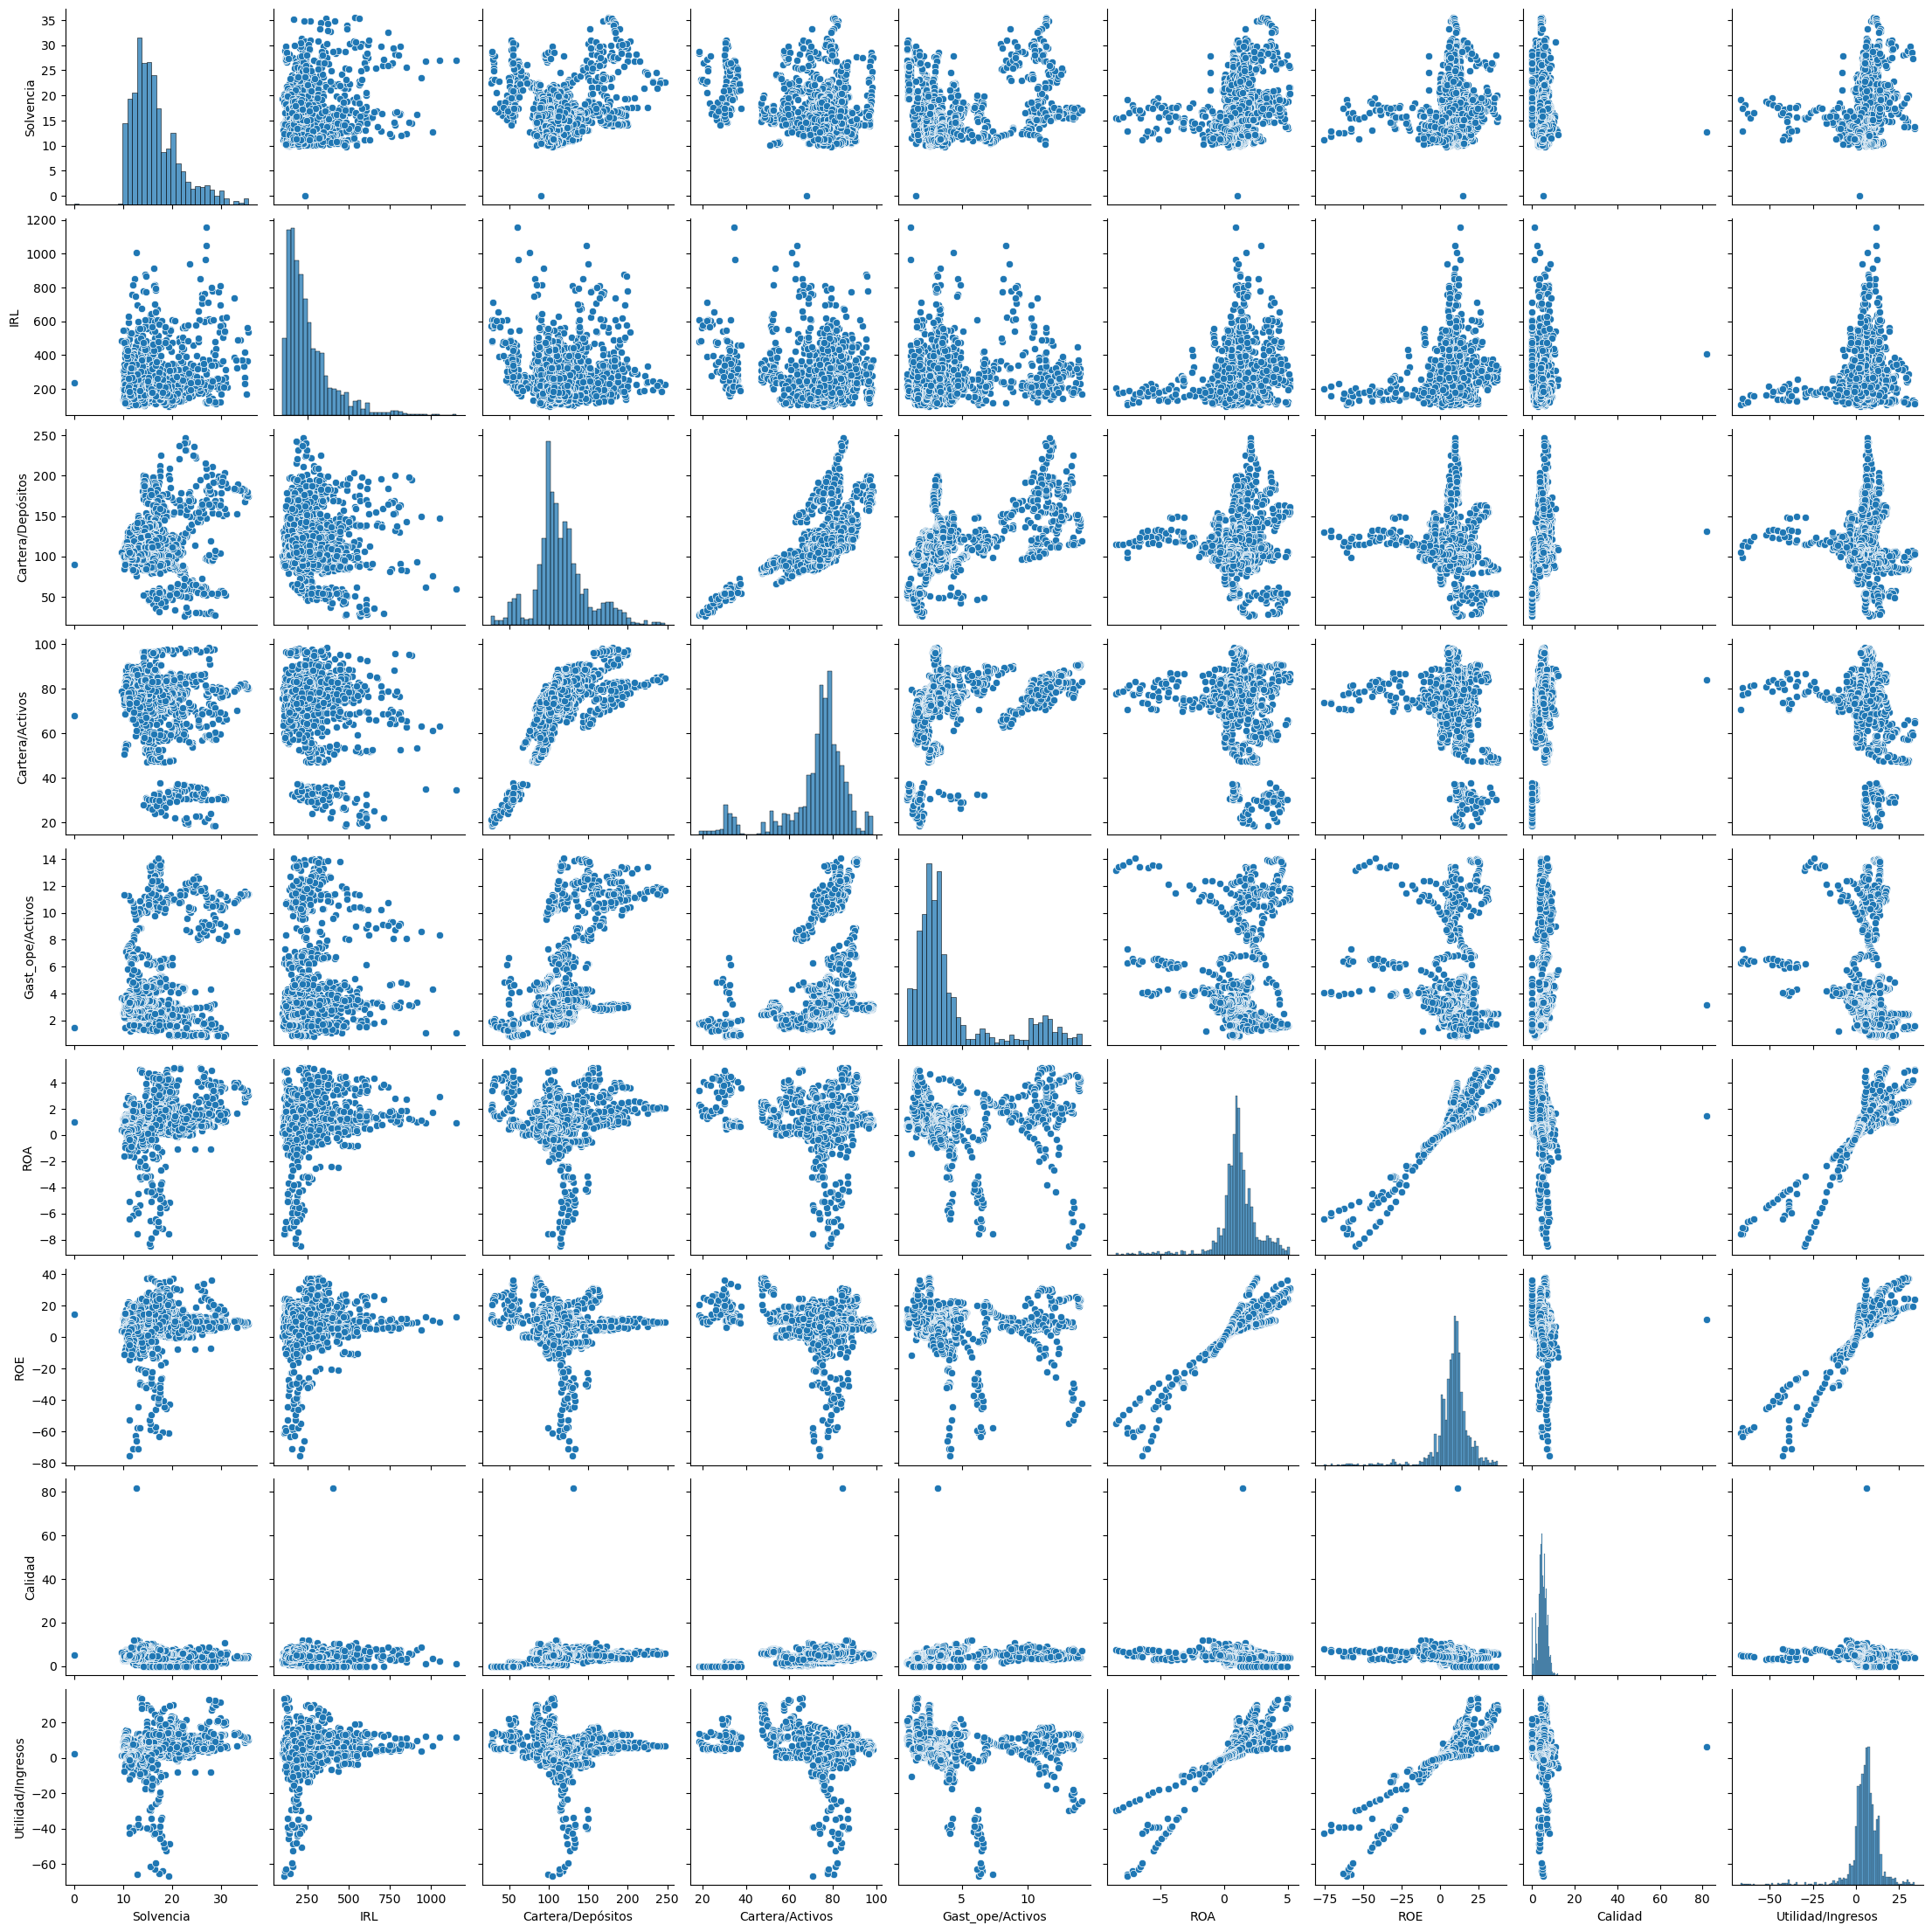

In [7]:
sns.pairplot(datos, kind="scatter")
plt.show()

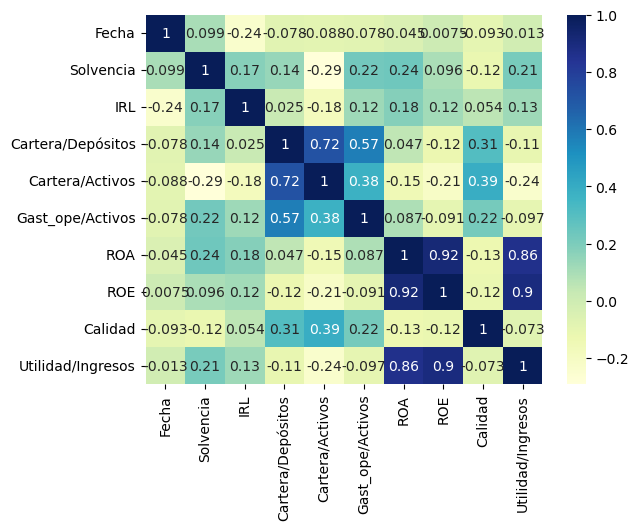

                      Fecha  Solvencia       IRL  Cartera/Depósitos  \
Fecha              1.000000   0.099328 -0.237158          -0.077862   
Solvencia          0.099328   1.000000  0.172477           0.137875   
IRL               -0.237158   0.172477  1.000000           0.025042   
Cartera/Depósitos -0.077862   0.137875  0.025042           1.000000   
Cartera/Activos   -0.088405  -0.292106 -0.177246           0.722243   
Gast_ope/Activos  -0.077692   0.224075  0.124938           0.573792   
ROA               -0.045317   0.235506  0.177540           0.046819   
ROE                0.007492   0.096074  0.116054          -0.122926   
Calidad           -0.092727  -0.120237  0.053947           0.305932   
Utilidad/Ingresos -0.012918   0.207849  0.125778          -0.107895   

                   Cartera/Activos  Gast_ope/Activos       ROA       ROE  \
Fecha                    -0.088405         -0.077692 -0.045317  0.007492   
Solvencia                -0.292106          0.224075  0.235506  0.

In [8]:
datos2 = datos.drop('Entidad', axis=1)
correlation_matrix = datos2.corr()
dataplot = sns.heatmap(datos2.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
mp.show()
print(correlation_matrix)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Program

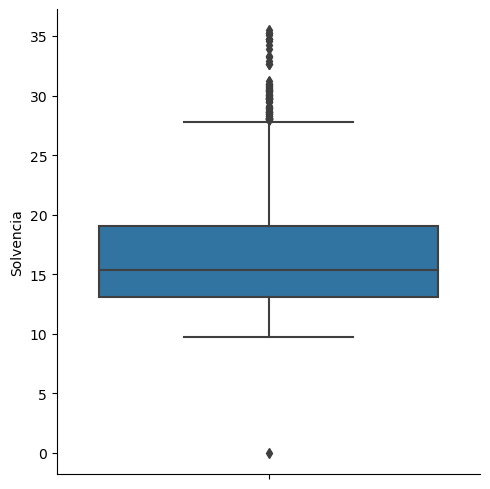

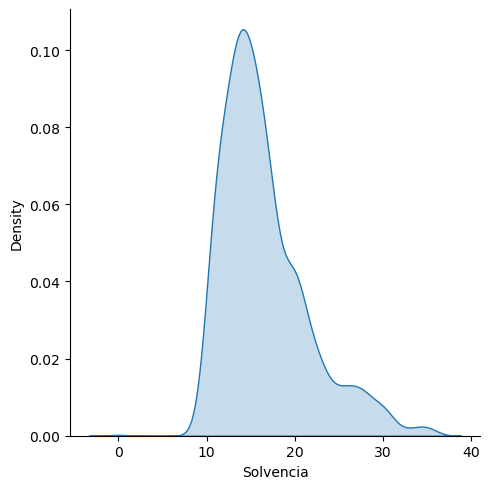

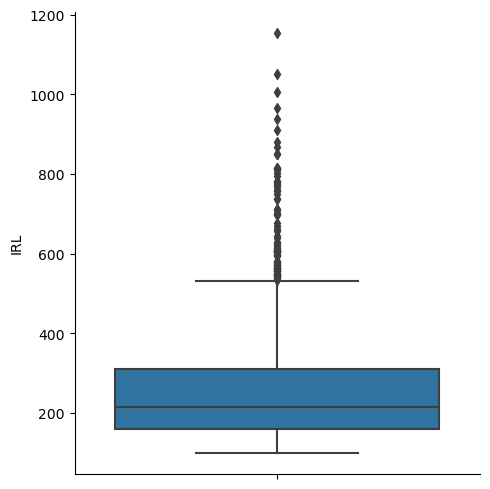

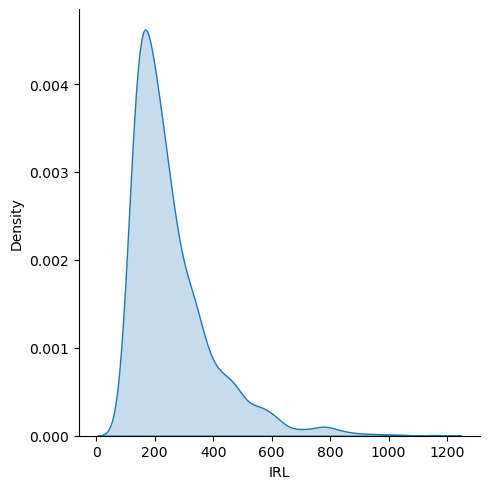

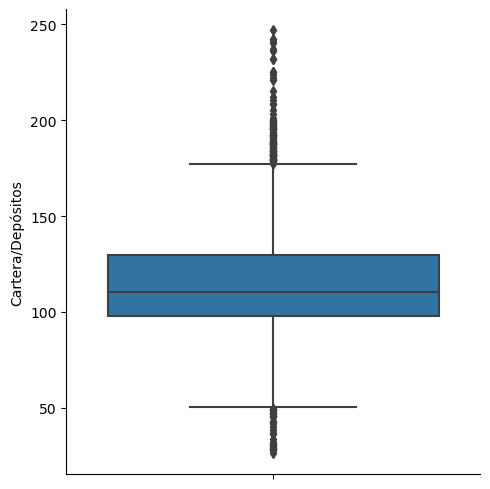

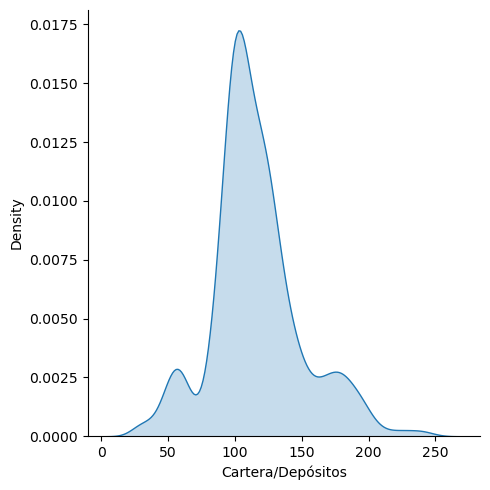

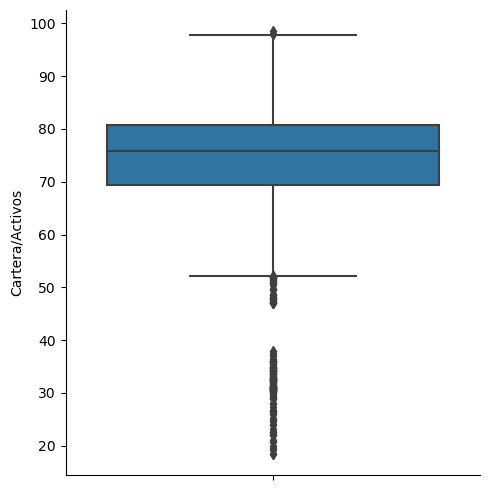

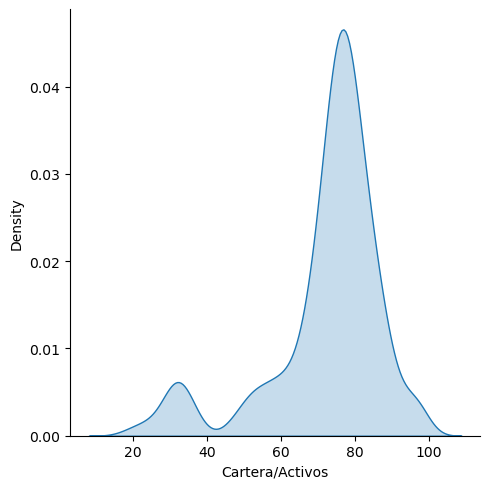

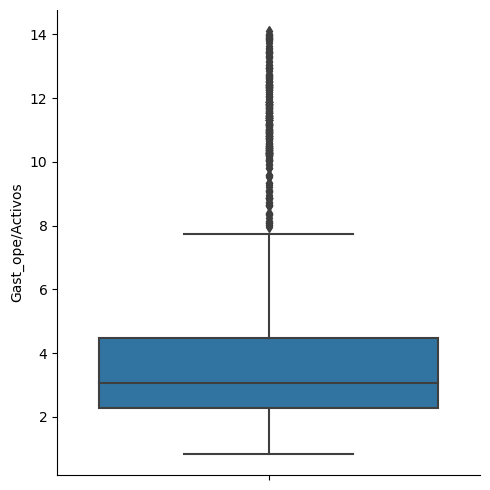

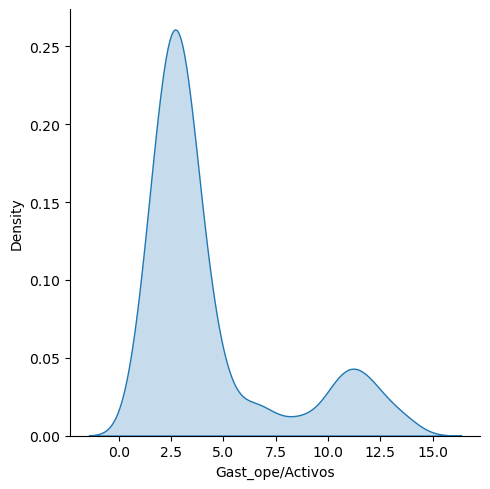

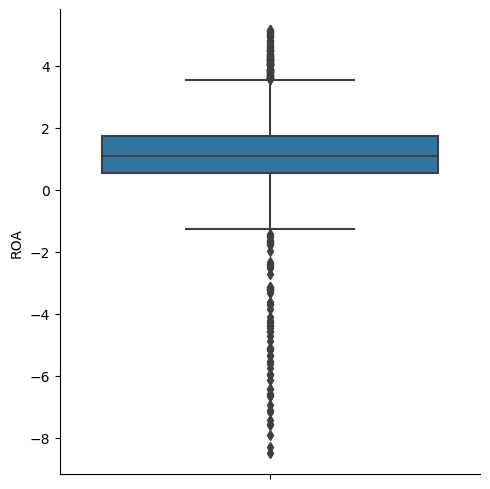

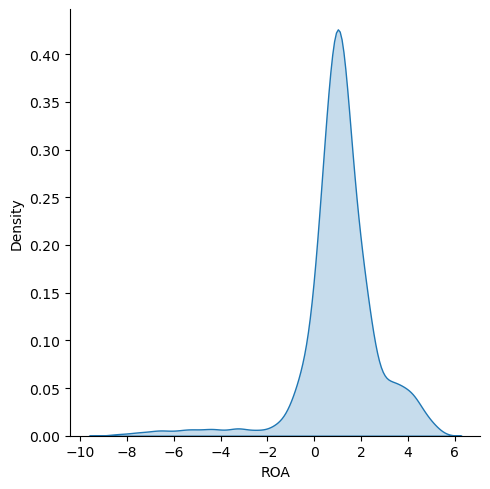

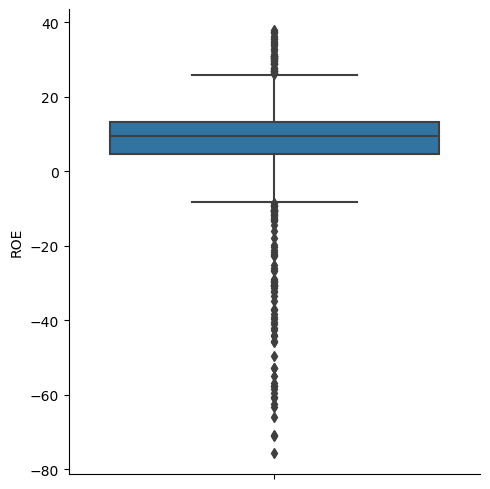

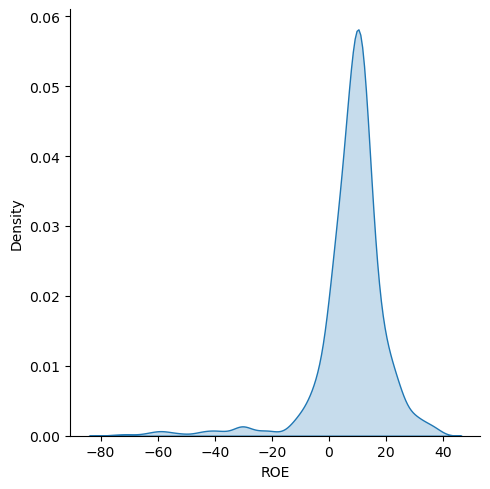

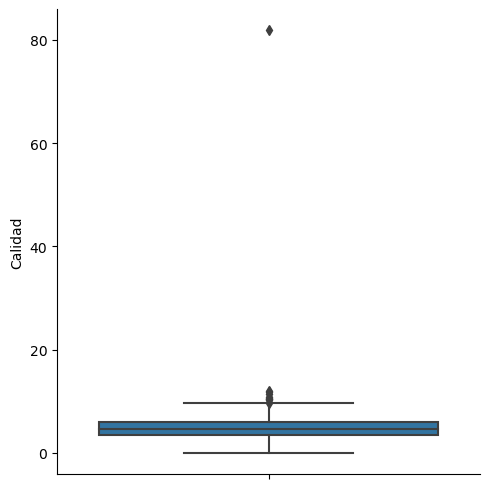

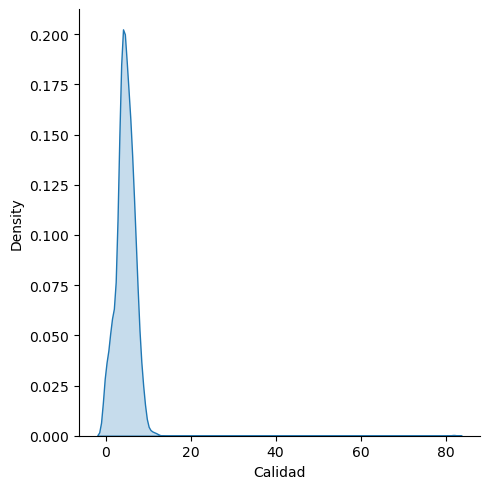

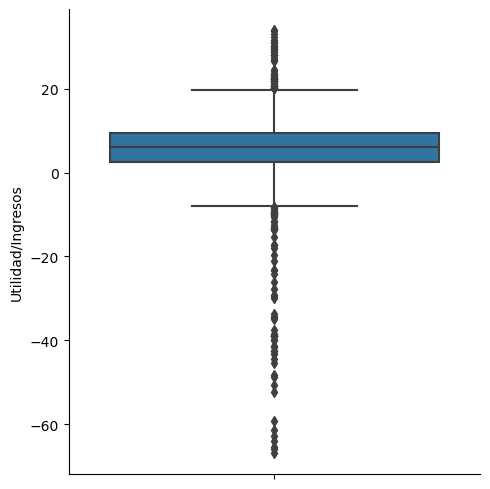

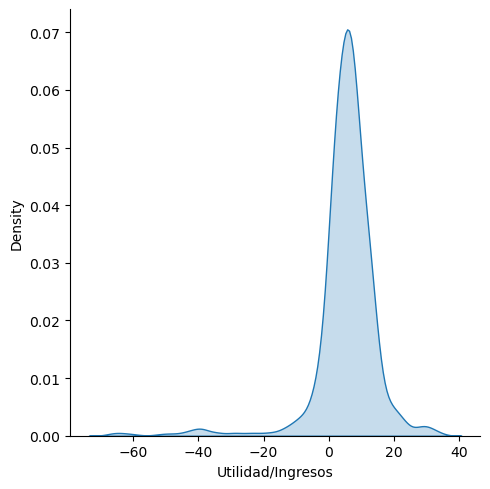

In [9]:
for i in AtributosNumericos:
  sns.catplot(data=datos, y=i, kind="box",margin_titles=True)
  sns.displot(datos, x=i, kind="kde",fill=True,common_norm=False)

**A partir del cuadro podemos mencionar las siguientes conclusiones:**

**Utilidad/ingresos vs. ROA y ROE:** Existe una correlación lineal positiva muy fuerte entre la utilidad como proporción de los ingresos y las medidas de rentabilidad ROA y ROE. Esto sucede pues a mayores utilidades es de esperarse que también se incrementen estas medidas pues también tienen de numerador a las utilidades.
**Cartera/Depósitos vs. Gast_Op/Activos:** Existe una correlación lineal positiva (0.57) entre la relación Cartera/Depósitos y el gasto operativo como proporción de los activos. Esto sugiere que a medida que la proporción de cartera aumenta, el gasto operativo también aumenta.
**Cartera/Activos vs. solvencia e IRL:** Si una entidad está muy expuesta a cartera su solvencia e IRL se ven reducidos.
**Cartera/Activos, Cartera/Depósitos y calidad:**  entre más expuesta esté una entidad a cartera también está expuesta a que hayan más incumplimiento por deudores y por ende el indicador de calidad puede incrementar






In [10]:
datos = datos.set_index('Fecha')

In [11]:
# Se defienen las x como la base sin las dos primeras columnas:

x = datos.iloc[:, 1:]
x

,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_ope/Activos,ROA,ROE,Calidad,Utilidad/Ingresos
Fecha,,,,,,,,,
2018-01-01,17.59,334.0,225.122316,82.101505,13.439939,1.649447,6.832722,5.288146,5.398005
2018-02-01,17.52,290.4,212.079849,81.778429,13.299214,1.699940,7.028450,5.395301,5.543541
2018-03-01,17.55,291.2,205.329984,81.630571,12.960920,1.836486,7.571401,5.567269,5.961291
2018-04-01,17.48,335.3,198.756601,83.327073,13.322951,1.938096,7.962732,5.479457,6.244561
2018-05-01,15.57,346.8,196.161567,82.957054,13.263120,2.004092,8.310213,5.415416,6.451046
...,...,...,...,...,...,...,...,...,...
2023-02-01,10.84,197.3,102.515452,75.744039,3.161129,0.106966,1.559908,4.233697,0.361228
2023-03-01,11.15,263.9,105.909252,75.768870,3.298532,-0.048405,-0.712194,4.662172,-0.161198
2023-04-01,11.26,222.2,106.662721,75.969979,3.357025,-0.132637,-1.965695,5.031444,-0.427350


In [12]:
# Estandarizamos las variables para que no influyan las distintas medidas:

scaler = StandardScaler()
x_estandarizado = scaler.fit_transform(x)
x_estandarizado

array([[ 0.21963396,  0.54677542,  3.24355129, ..., -0.08568008,
         0.22749474,  0.01495555],
       [ 0.20530392,  0.23422122,  2.85752874, ..., -0.0698514 ,
         0.26566523,  0.02962447],
       [ 0.21144537,  0.23995616,  2.65775061, ..., -0.02594243,
         0.32692333,  0.07173038],
       ...,
       [-1.07621094, -0.25468237, -0.26253945, ..., -0.79721613,
         0.13605259, -0.57219462],
       [-1.10691817, -0.337839  , -0.25030902, ..., -0.91825265,
         0.07493897, -0.60094984],
       [-1.05778661, -0.52422453, -0.29120534, ..., -1.02952416,
         0.1225132 , -0.61976955]])

In [13]:
# Se tienen entonces 145 observaciones para 9 variables estandarizadas:

print(len(x_estandarizado[0]))
print(len(x_estandarizado))

9
1637


In [14]:
methods = ['single', 'complete', 'average', 'centroid','ward']

In [15]:
# registre el experimento
experiment = mlflow.set_experiment("Experimientos de Clusters indicadores de Riesgo")

In [16]:
datos.head(5)

,Entidad,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_ope/Activos,ROA,ROE,Calidad,Utilidad/Ingresos
Fecha,,,,,,,,,,
2018-01-01,BANCAMÍA S. A.,17.59,334.0,225.122316,82.101505,13.439939,1.649447,6.832722,5.288146,5.398005
2018-02-01,BANCAMÍA S. A.,17.52,290.4,212.079849,81.778429,13.299214,1.699940,7.028450,5.395301,5.543541
2018-03-01,BANCAMÍA S. A.,17.55,291.2,205.329984,81.630571,12.960920,1.836486,7.571401,5.567269,5.961291
2018-04-01,BANCAMÍA S. A.,17.48,335.3,198.756601,83.327073,13.322951,1.938096,7.962732,5.479457,6.244561
2018-05-01,BANCAMÍA S. A.,15.57,346.8,196.161567,82.957054,13.263120,2.004092,8.310213,5.415416,6.451046


2023/11/12 19:57:13 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



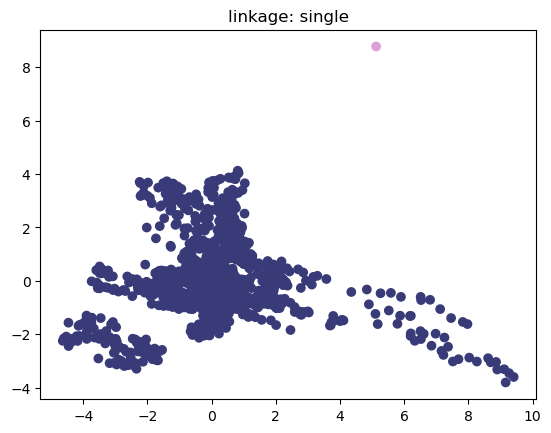

Silhouette Score: 0.8362863855450414
0.8362863855450414


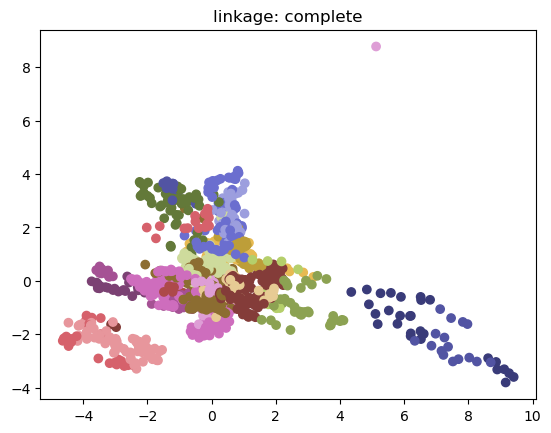

Silhouette Score: 0.27117633698775706
0.27117633698775706


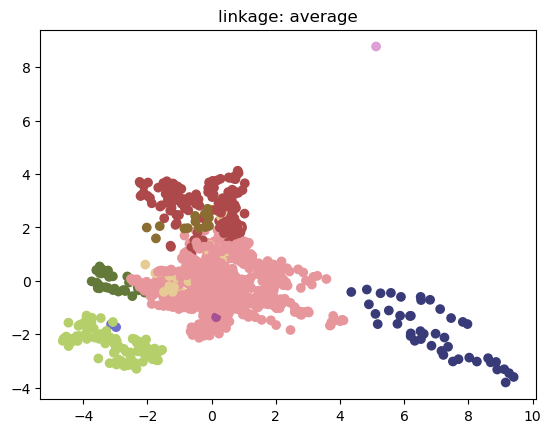

Silhouette Score: 0.28662180885202726
0.28662180885202726


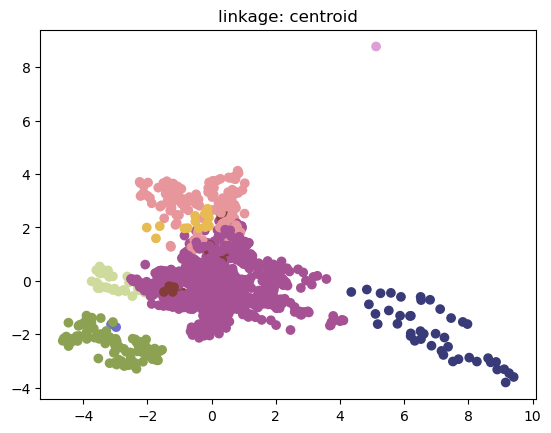

Silhouette Score: 0.3485227361519751
0.3485227361519751


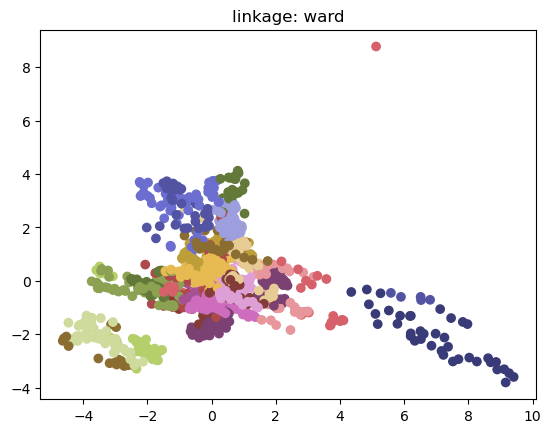

Silhouette Score: 0.3190022825590794
0.3190022825590794


In [17]:
for method in methods:
    
    with mlflow.start_run(experiment_id=experiment.experiment_id):
        # defina los parámetros del modelo
        # Configurar y aplicar PCA:
        n_components = 0.80  # Retener el 80% de la varianza.
        pca = PCA(n_components=n_components, svd_solver='full', random_state=0)
        pca.fit(x_estandarizado)

        # Ajustar PCA a los datos originales y transformarlos
        x_reduced = pca.fit_transform(x_estandarizado)

        distances = linkage(x_reduced, method=method, metric="euclidean")
        clusters = fcluster(distances, 3, criterion="distance")
        plt.title('linkage: ' + method)
        plt.scatter(x_reduced[:,0], x_reduced[:,1], c=clusters, cmap='tab20b')
        plt.show()
        score_7 = silhouette_score(x_reduced, clusters)
        print(f"Silhouette Score: {score_7}")

        # Registre los parámetros
        mlflow.log_param("Metodo", method)

        # Cree y registre la métrica de interés
        mlflow.log_metric("Silhouette core", score_7)
        print(score_7)

        mlflow.log_param("Varianza explicada para PCA", n_components)

In [18]:
indicador = x_reduced[:, 0]
indicador = pd.DataFrame(indicador)
indicador.rename(columns={0: 'Indicador'}, inplace=True)
indicador

# Se integran los campos de Fecha y Banco de la base:
indicador['Fecha'] = datos_2['Fecha']
indicador['Entidad'] = datos_2['Entidad']
indicador

indicador.to_excel('/home/ubuntu/prec/data/PCA_ncomp_1.xlsx', index=False)